importing

In [1]:
from finalavltree import AVLTree
from finalredblacktree import RedBlackTree
import time
import os
#import pandas as pd
import csv
import matplotlib.pyplot as plt

file setup

In [ ]:
files = [
    '100_ordered_numbers.txt', '100_random_numbers.txt', '500_random_numbers.txt', '500_random_numbers.txt', '750_random_numbers.txt', '750_random_numbers.txt'#  '1000_ordered_numbers.txt', '1000_random_numbers.txt'#,'5000_ordered_numbers.txt', '5000_random_numbers.txt'#,
    #'10000_ordered_numbers.txt', '10000_random_numbers.txt'
]

directory = 'testingdata'

def read_int_from_file(filename):
    numbers = []
    file_path = os.path.join(directory, filename)  # Join the directory and filename

    try:
        with open(file_path, 'r') as file:
            for line in file:
                line_numbers = line.strip().split()
                for num_str in line_numbers:
                    try:
                        num = int(num_str)
                        numbers.append(num)
                    except ValueError:
                        print(f"Skipping non-integer value: {num_str}")
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return 0

    print(f"Step 1 Complete for {filename}")
    return numbers


defining tests

In [3]:
def test_tree_operations(tree_type:str, data):
    if tree_type == "RedBlackTree":
        tree= RedBlackTree()
        print("Red-Black tree recognized")
    if tree_type== "AVLTree":
        tree = AVLTree()
        print("AVL tree recognized")
    start_time = time.time()
    
    print(f"Insertion Timer Started for {tree_type}")
    for item in data:
        tree.insert(item)
        print(f"Inserting {item}")
    insertion_time = time.time() - start_time
    print(f"Insertion Test Complete for {tree_type}")
   
    start_time = time.time()
    print(f"Search Timer Started for {tree_type}")
    for item in data:
        tree.search(item)
        print(f"Searching For {item}")
    search_time = time.time() - start_time
    print(f"Search Test Complete for {tree_type}")
    
    start_time = time.time()
    print(f"Delete Timer Started for {tree_type}")
    for item in data:
        tree.delete(item)
        print(f"Deleting {item}")
    deletion_time = time.time() - start_time
    print(f"Delete Test Complete for {tree_type}")

    return insertion_time, search_time, deletion_time

# results = []

# for filename in files:
#     start_time = time.time() 
#     numbers = read_int_from_file(filename)
#     count = tree.insert(numbers)
#     end_time = time.time()
#     time_taken = end_time - start_time
#     results.append((len(numbers), time_taken))
#     print(f"Processed {filename}: {count} inserted into Red-Black Tree in {time_taken:.4f} seconds.")

# print(results)


results

In [4]:
# Initialize lists to store times for plotting
tree_sizes = []
avl_insert_times = []
rb_insert_times = []
avl_search_times = []
rb_search_times = []
avl_delete_times = []
rb_delete_times = []

for file in files:
    data = read_int_from_file(file)  

    if data: 
        red_black_tree_times = test_tree_operations("RedBlackTree", data)
        avl_tree_times = test_tree_operations("AVLTree", data)

        print(f"\nResults for {file}:")
        tree_sizes.append(len(data))
        print(f"Red-Black Tree: Insertion: {red_black_tree_times[0]}s,Search: {red_black_tree_times[1]}s, Deletion: {red_black_tree_times[2]}s")
        rb_insert_times.append(red_black_tree_times[0])
        rb_search_times.append(red_black_tree_times[1])
        rb_delete_times.append(red_black_tree_times[2])
        print(f"AVL Tree: Insertion: {avl_tree_times[0]}s, Search: {avl_tree_times[1]}s, Deletion: {avl_tree_times[2]}s")  
        avl_insert_times.append(avl_tree_times[0])
        avl_search_times.append(avl_tree_times[1])
        avl_delete_times.append(avl_tree_times[2])
    else:
        print(f"Skipping {file} due to missing or invalid data.")

Step 1 Complete for 100_ordered_numbers.txt
Red-Black tree recognized
Insertion Timer Started for RedBlackTree
Inserting 0
Inserting 1
Inserting 2
Inserting 3
Inserting 4
Inserting 5
Inserting 6
Inserting 7
Inserting 8
Inserting 9
Inserting 10
Inserting 11
Inserting 12
Inserting 13
Inserting 14
Inserting 15
Inserting 16
Inserting 17
Inserting 18
Inserting 19
Inserting 20
Inserting 21
Inserting 22
Inserting 23
Inserting 24
Inserting 25
Inserting 26
Inserting 27
Inserting 28
Inserting 29
Inserting 30
Inserting 31
Inserting 32
Inserting 33
Inserting 34
Inserting 35
Inserting 36
Inserting 37
Inserting 38
Inserting 39
Inserting 40
Inserting 41
Inserting 42
Inserting 43
Inserting 44
Inserting 45
Inserting 46
Inserting 47
Inserting 48
Inserting 49
Inserting 50
Inserting 51
Inserting 52
Inserting 53
Inserting 54
Inserting 55
Inserting 56
Inserting 57
Inserting 58
Inserting 59
Inserting 60
Inserting 61
Inserting 62
Inserting 63
Inserting 64
Inserting 65
Inserting 66
Inserting 67
Inserting 68
In

analysis/comparison

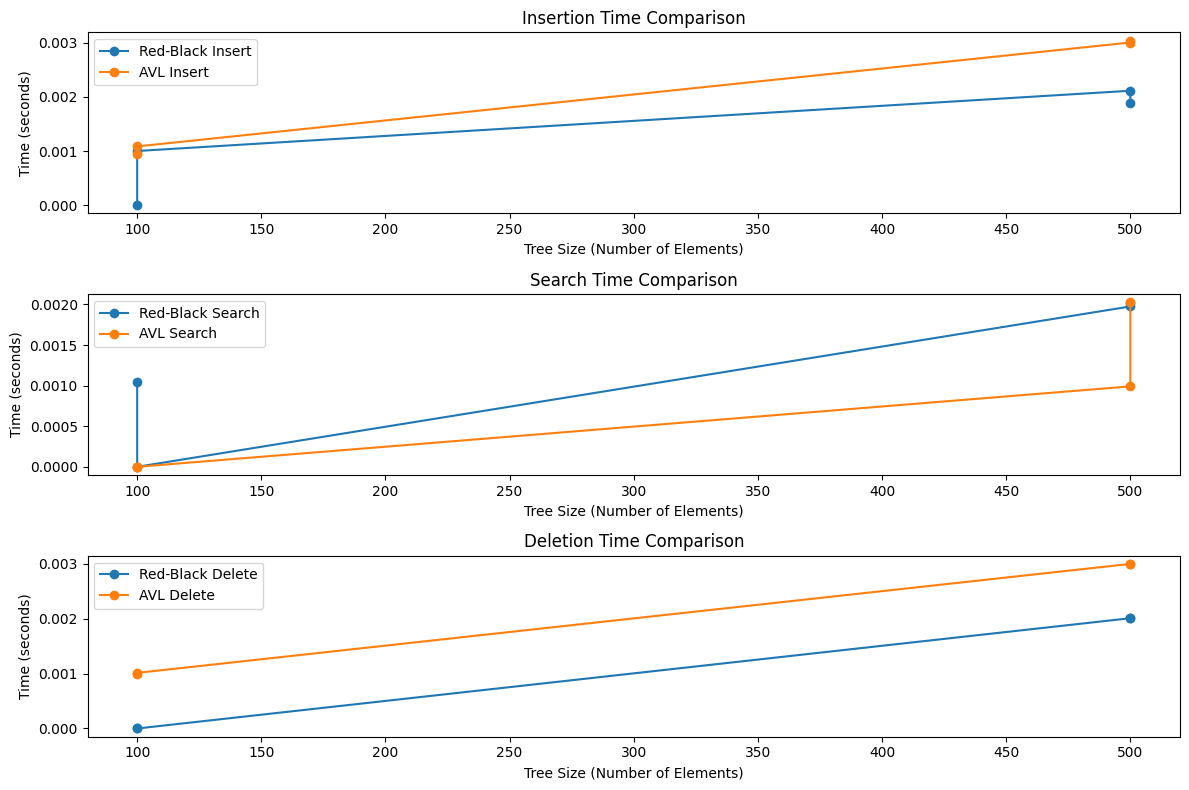

In [5]:
# Plotting the results using matplotlib
plt.figure(figsize=(12, 8))

# Insertion Time Comparison
plt.subplot(3, 1, 1)
plt.plot(tree_sizes, rb_insert_times, label="Red-Black Insert", marker='o')
plt.plot(tree_sizes, avl_insert_times, label="AVL Insert", marker='o')
plt.xlabel('Tree Size (Number of Elements)')
plt.ylabel('Time (seconds)')
plt.title('Insertion Time Comparison')
plt.legend()

# Search Time Comparison
plt.subplot(3, 1, 2)
plt.plot(tree_sizes, rb_search_times, label="Red-Black Search", marker='o')
plt.plot(tree_sizes, avl_search_times, label="AVL Search", marker='o')
plt.xlabel('Tree Size (Number of Elements)')
plt.ylabel('Time (seconds)')
plt.title('Search Time Comparison')
plt.legend()

# Deletion Time Comparison
plt.subplot(3, 1, 3)
plt.plot(tree_sizes, rb_delete_times, label="Red-Black Delete", marker='o')
plt.plot(tree_sizes, avl_delete_times, label="AVL Delete", marker='o')
plt.xlabel('Tree Size (Number of Elements)')
plt.ylabel('Time (seconds)')
plt.title('Deletion Time Comparison')
plt.legend()

plt.tight_layout()
plt.show()